In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score

In [6]:
import pandas as pd
import io
df=pd.read_csv('drug200.csv')
df

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


In [7]:
df.shape

(200, 6)

In [8]:
drug_label = LabelEncoder()
df['Drug'] = drug_label.fit_transform(df['Drug'])
df['BP'] = drug_label.fit_transform(df['BP'])
df['Cholesterol'] = drug_label.fit_transform(df['Cholesterol'])
df['Sex'] = drug_label.fit_transform(df['Sex'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    int32  
 2   BP           200 non-null    int32  
 3   Cholesterol  200 non-null    int32  
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    int32  
dtypes: float64(1), int32(4), int64(1)
memory usage: 6.4 KB


In [9]:
df.describe()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,44.315000,0.520000,0.910000,0.485000,16.084485,2.870000
std,16.544315,0.500854,0.821752,0.501029,7.223956,1.372047
min,15.000000,0.000000,0.000000,0.000000,6.269000,0.000000
25%,31.000000,0.000000,0.000000,0.000000,10.445500,2.000000
50%,45.000000,1.000000,1.000000,0.000000,13.936500,3.000000
75%,58.000000,1.000000,2.000000,1.000000,19.380000,4.000000
max,74.000000,1.000000,2.000000,1.000000,38.247000,4.000000


In [10]:
df.isnull().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

<Axes: >

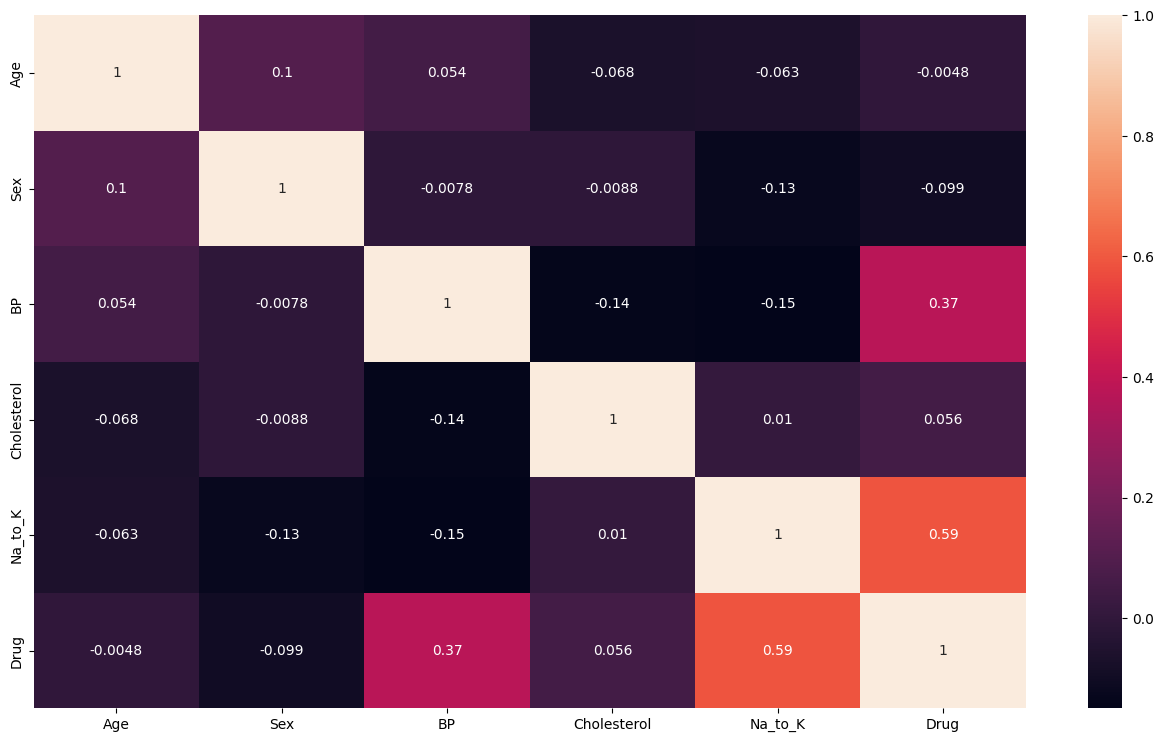

In [11]:
import seaborn as sns
plt.figure(figsize=(16,9))
sns.heatmap(df.corr(),annot=True)

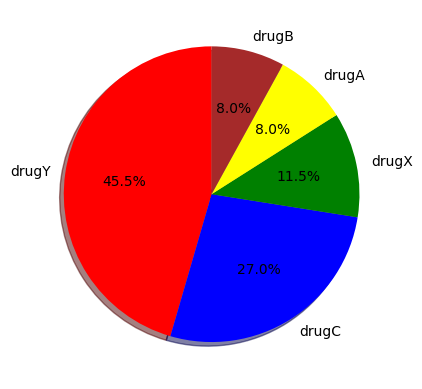

In [12]:
import matplotlib.pyplot as plt
labels = ['drugY', 'drugC', 'drugX', 'drugA', 'drugB']
values = df['Drug'].value_counts().values
fig1, ax1 = plt.subplots()
colors = ['red', 'blue','green','yellow','brown']
ax1.pie(values, labels=labels, autopct='%1.1f%%',shadow=True,startangle=90,colors=colors)
plt.show()

In [13]:
df[['Drug', 'Sex', 'BP', 'Cholesterol']].head()

,Drug,Sex,BP,Cholesterol
0,4,0,0,0
1,2,1,1,0
2,2,1,1,0
3,3,0,2,0
4,4,0,1,0


In [14]:
X = df[['Age', 'Drug', 'Sex', 'BP', 'Cholesterol', 'Na_to_K']]
y = df['Drug']

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.2, random_state = 0)

In [16]:
tree_model = DecisionTreeClassifier()
tree_model = tree_model.fit(X_train, y_train)
y_pred = tree_model.predict(X_test)
accuracy = metrics.accuracy_score(y_test, y_pred)
accuracy

1.0

In [18]:
fig = plt.figure(figsize=(120,100))
tree_fig = tree.plot_tree(
tree_model,
feature_names = ['Age', 'Drug', 'Sex', 'BP', 'Cholesterol', 'Na_to_K'],
class_names = ['drugA', 'drugB', 'drugC', 'drugX', 'drugY'],
filled = True)